# Import libraries

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Defines

In [3]:
PATH_DATASET = "./dataset/dataset_train.csv"
PLOT_WIDTH = 10

# Import dataset

In [16]:
# Dataset path
dataset = pd.read_csv(PATH_DATASET)
dataset_size = dataset.size
column_target = "is_click"

dataset.sample(10)


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
263543,155804,2017-07-05 12:17,295906,H,105960,11085,5,270915.0,5.0,Male,5.0,3.0,2.0,1,0
463022,238222,2017-07-07 23:36,960673,I,118601,28529,4,82527.0,4.0,Male,4.0,3.0,4.0,1,0
266380,444657,2017-07-05 12:59,778215,I,360936,13787,2,NaN,4.0,Male,4.0,3.0,2.0,0,0
179945,42743,2017-07-04 11:01,561035,C,405490,60305,3,NaN,1.0,Male,1.0,3.0,NaN,0,0
294161,459459,2017-07-05 19:02,910764,C,360936,13787,3,NaN,4.0,Male,4.0,3.0,1.0,1,0
23688,127373,2017-07-02 10:31,180597,C,359520,13787,4,NaN,3.0,Male,3.0,3.0,2.0,0,0
299878,439368,2017-07-05 19:49,312994,I,360936,13787,2,NaN,2.0,Male,2.0,1.0,NaN,0,0
246005,62260,2017-07-05 08:05,867943,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0
74556,57996,2017-07-02 21:15,1064121,C,405490,60305,3,NaN,3.0,Male,3.0,3.0,2.0,0,0
393791,228395,2017-07-07 03:50,939468,G,118601,28529,4,82527.0,11.0,Female,5.0,2.0,NaN,0,0


In [6]:
def convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return ''

# Parameters

In [35]:
# Parameter analyze
def analyze_nan_values(ds, param):
    print(f"NaN counts for '{param}': ", ds[param].isna().sum())

def analyze_value_counts(ds, param):
    print(f"Value counts for '{param}': ", ds[param].value_counts())


In [75]:
# Parameter plot
def plot_histogram(ds, param):
    sns.histplot(ds[param])
    plt.tight_layout()
    plt.show()

def plot_bar(ds, param):
    category_counts = ds[param].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(category_counts.index.astype(str), category_counts.values)
    plt.show()

def plot_correlation(ds, param, param_target):
    corr_matrix = ds[[param, param_target]].corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix')
    plt.show()

def plot_correlation_list(ds, param_list):
    corr_matrix = ds[param_list].corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix')
    plt.show()

def plot_scatter(ds, param, param_target):
    plt.scatter(ds[param], ds[param_target], color='blue', alpha=0.5)
    plt.grid(True)
    plt.show()

def plot_violinPlot(ds, param, param_target):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=param, y=param_target, data=ds)
    plt.show()

In [59]:
# Parameter transform
def get_oneHot_encoding(ds, param, param_target):
    ds_encoded = ds[[param, param_target]]
    ds_encoded = pd.get_dummies(ds_encoded, columns=[param])
    return ds_encoded, ds_encoded.columns.tolist()

## Ad Parameters

### Session ID

This parameter can be dropped as its a random generated identifier with no relation with the target variable, so it doesn't carry predictive informatation.

In [20]:
parameter = "session_id"
analyze_nan_values(dataset, parameter)
#analyze_value_counts(dataset, parameter)
#plot_histogram(dataset, parameter)
#plot_correlation(dataset, parameter, column_target)

NaN counts for 'session_id':  0


### Webpage ID

NaN counts for 'webpage_id':  0
Value counts for 'webpage_id':  webpage_id
13787    160043
60305     95973
28529     35531
6970      35065
45962     29314
53587     28826
1734      27849
11085     25781
51181     24909
Name: count, dtype: int64


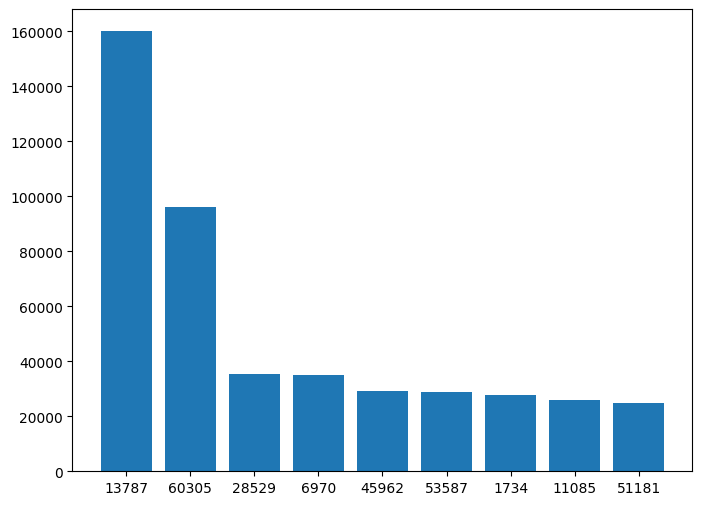

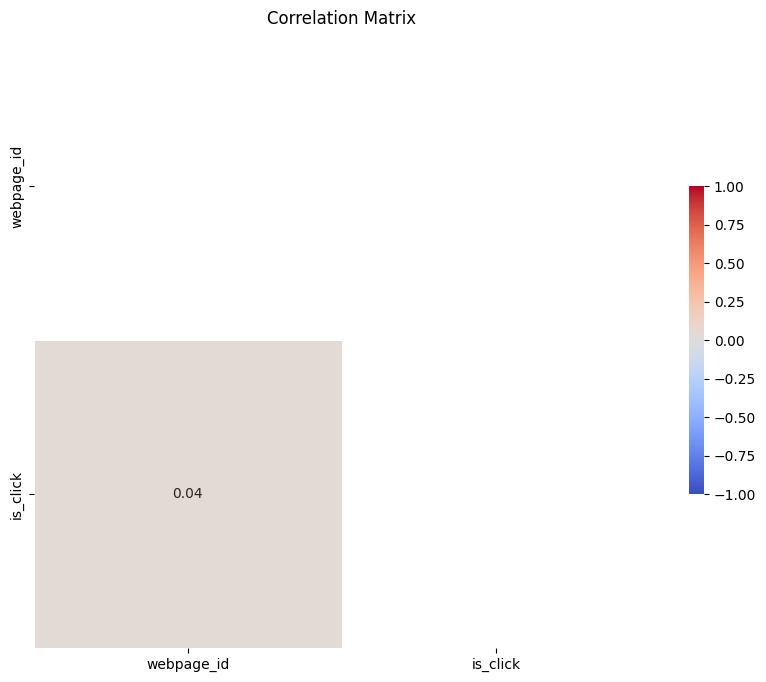

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8596\3099827092.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=param, y=param_target, data=ds, palette='Pastel1')


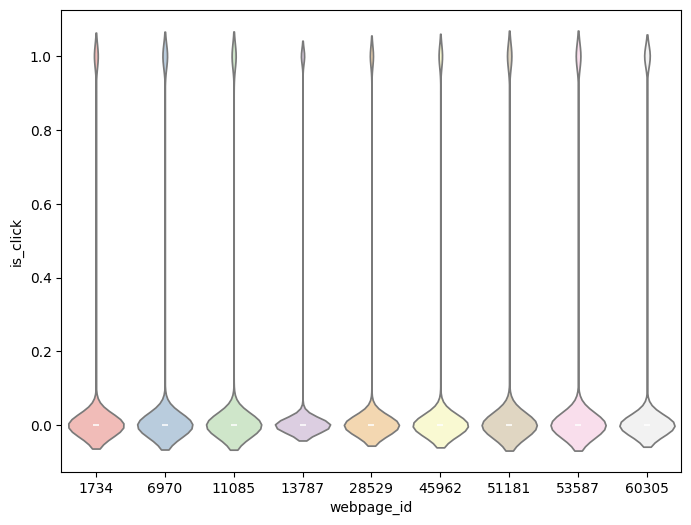

In [32]:
parameter = "webpage_id"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

### Campaign ID

NaN counts for 'campaign_id':  0
Value counts for 'campaign_id':  campaign_id
359520    108155
405490     95973
360936     51888
118601     35531
98970      35065
414149     29314
404347     28826
82320      27849
105960     25781
396664     24909
Name: count, dtype: int64


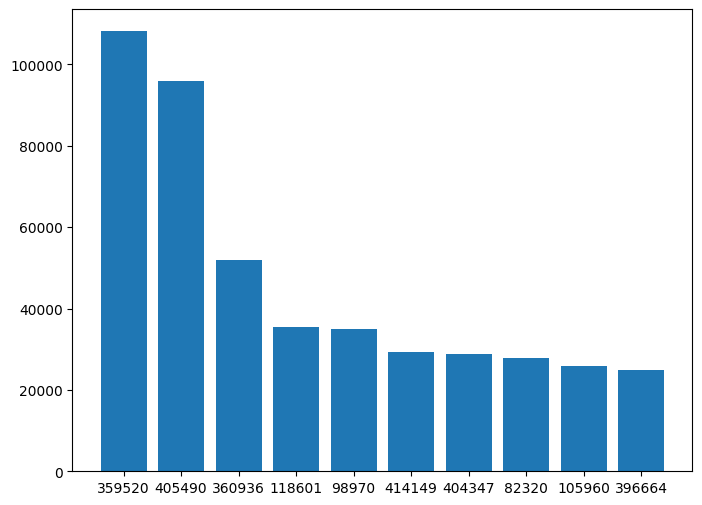

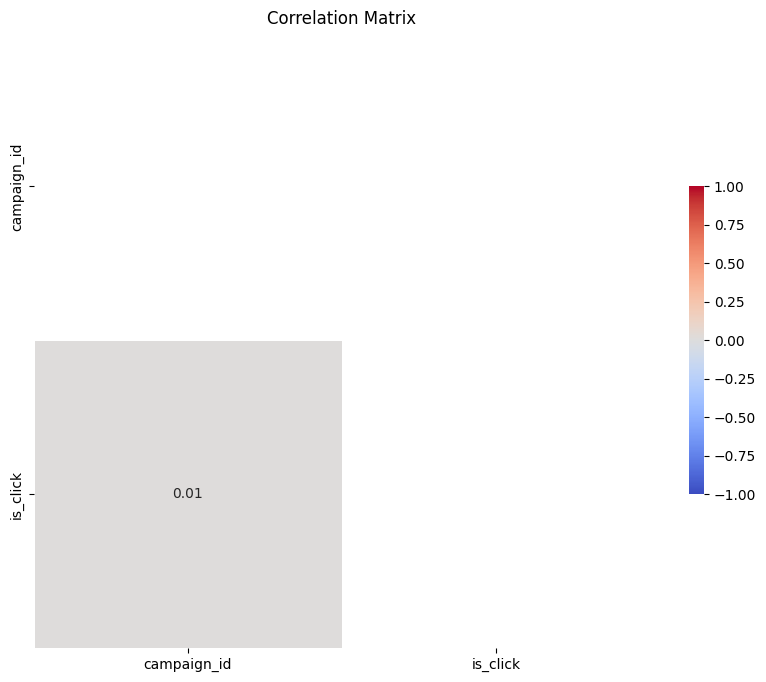

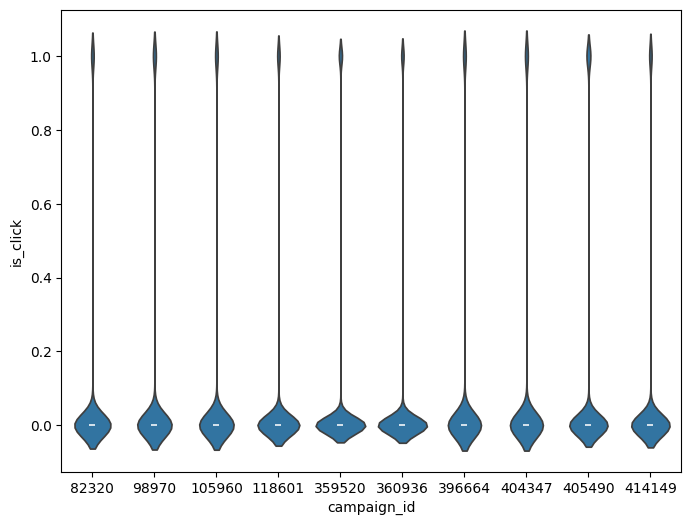

In [34]:
parameter = "campaign_id"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

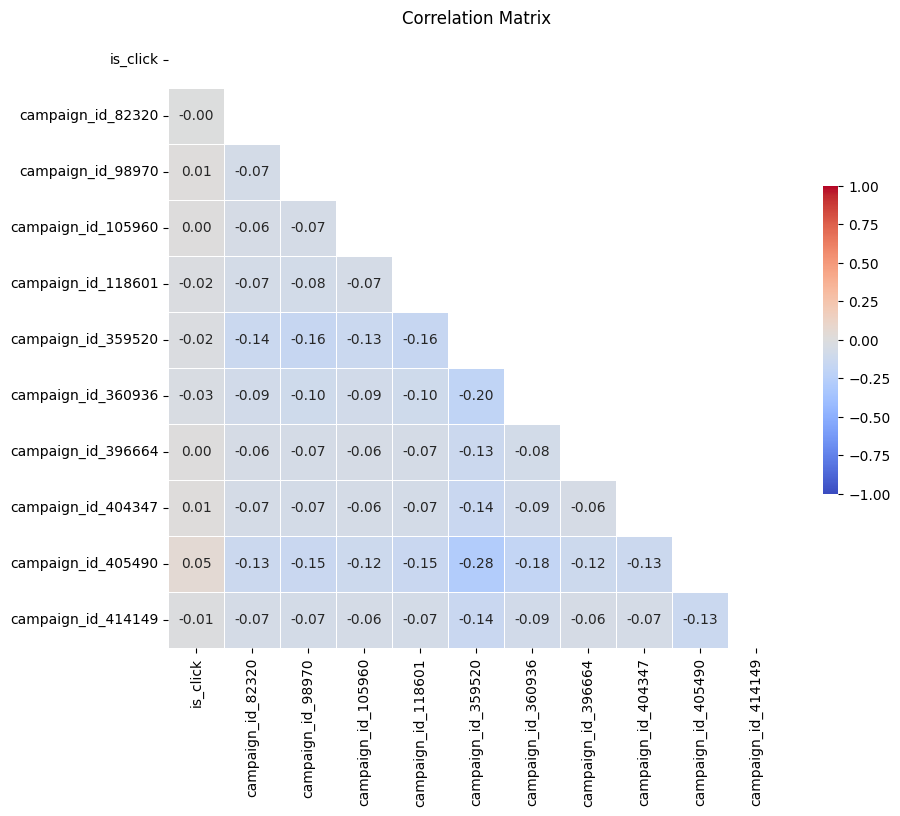

In [72]:
parameter = "campaign_id"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### User ID

In [73]:
parameter = "session_id"
analyze_nan_values(dataset, parameter)

NaN counts for 'session_id':  0


### User Group ID

NaN counts for 'user_group_id':  18243
Value counts for 'user_group_id':  user_group_id
3.0     140317
2.0     137278
4.0      50080
1.0      41946
5.0      21989
9.0      20264
10.0     13779
11.0      8839
8.0       6223
6.0       1724
7.0       1421
12.0      1035
0.0        153
Name: count, dtype: int64


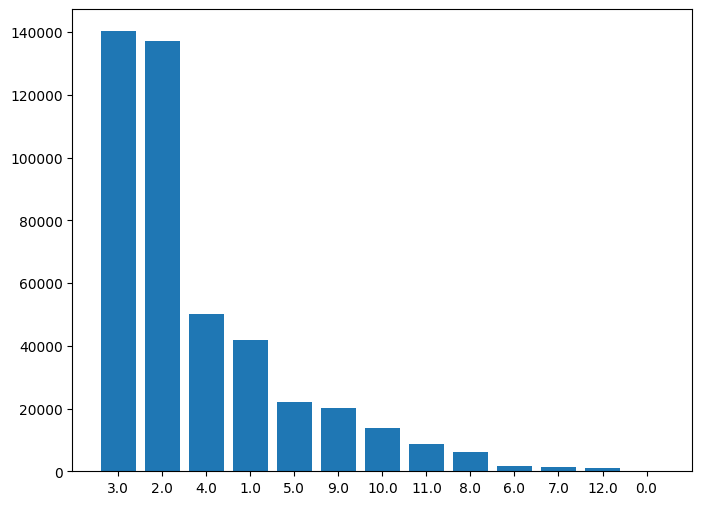

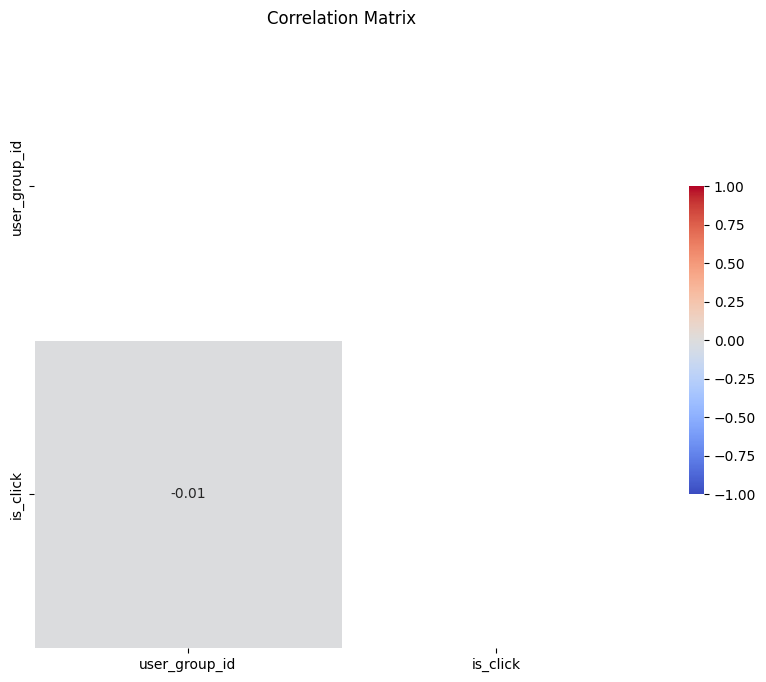

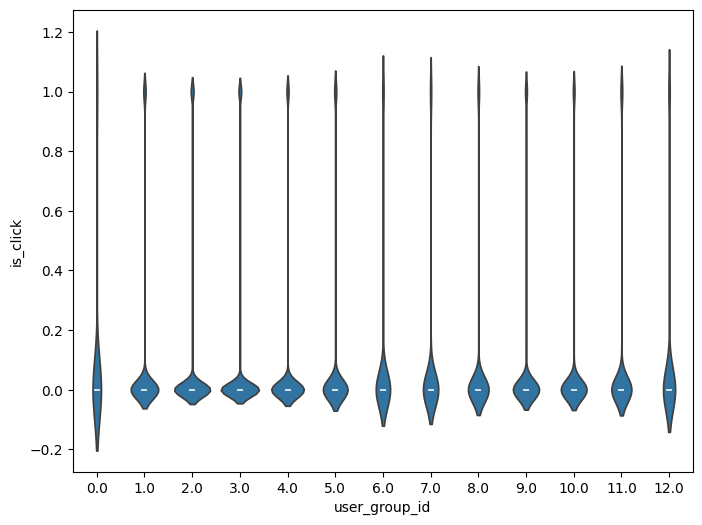

In [76]:
parameter = "user_group_id"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)

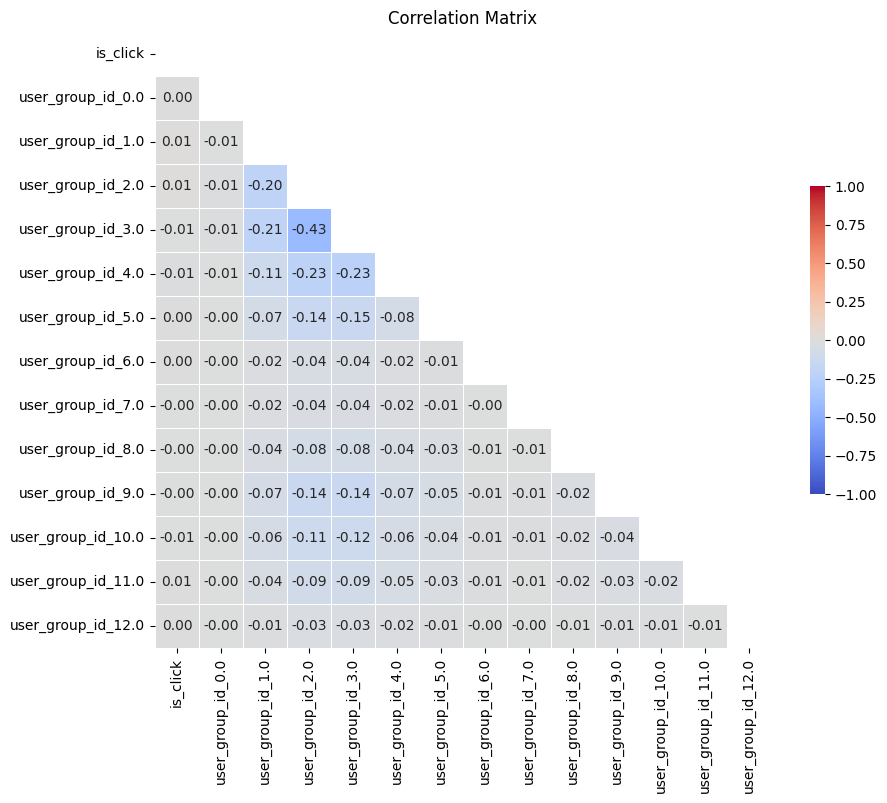

In [77]:
parameter = "user_group_id"
ds_encoded, ds_encoded_params = get_oneHot_encoding(dataset, parameter, column_target)
plot_correlation_list(ds_encoded, ds_encoded_params)

### Var 1

NaN counts for 'var_1':  0
Value counts for 'var_1':  var_1
0    267704
1    195587
Name: count, dtype: int64


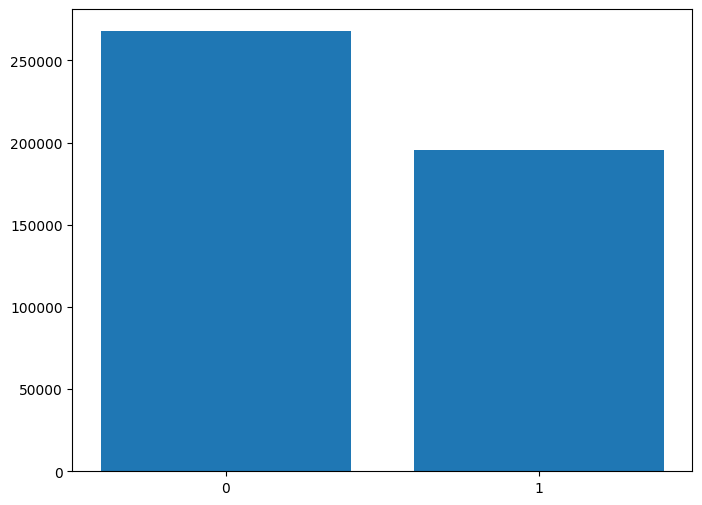

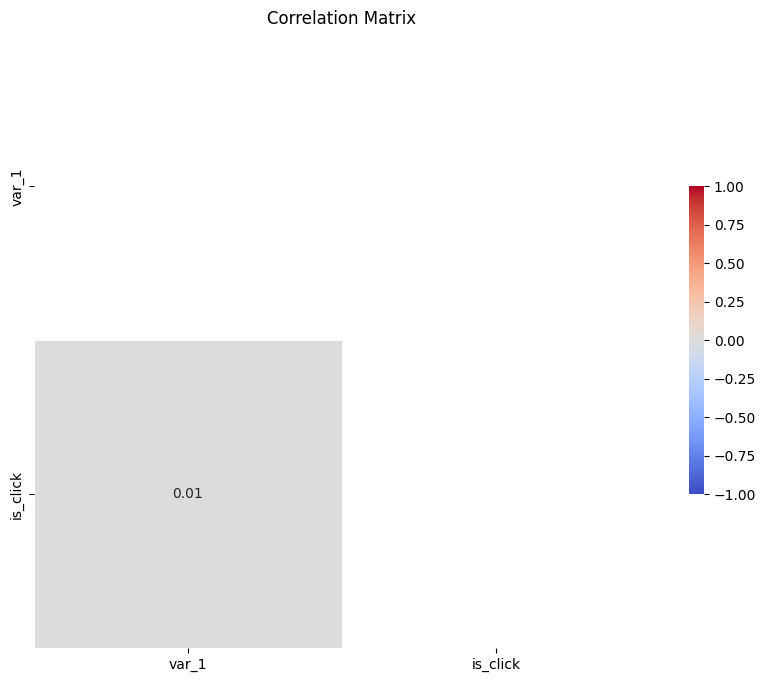

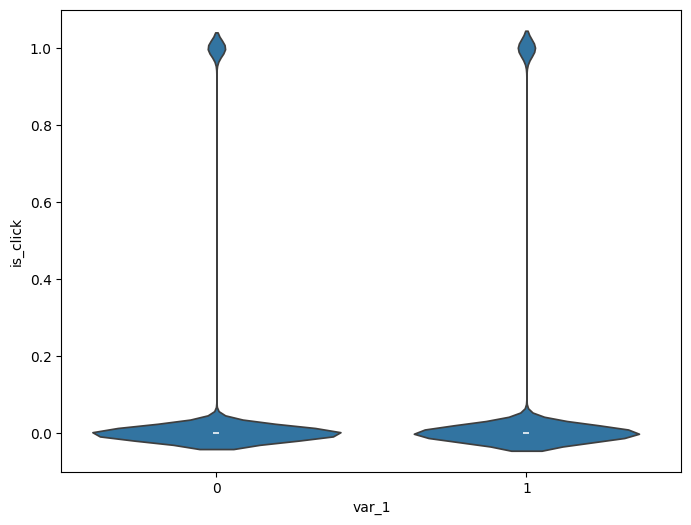

In [78]:
parameter = "var_1"
analyze_nan_values(dataset, parameter)
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)
plot_correlation(dataset, parameter, column_target)
plot_violinPlot(dataset, parameter, column_target)


*** Printing Nan counts for AD PARAMETERS:
NaN counts for 'session_id':  0
NaN counts for 'webpage_id':  0
NaN counts for 'campaign_id':  0
NaN counts for 'user_id':  0
NaN counts for 'user_group_id':  18243
NaN counts for 'var_1':  0
NaN counts for 'DateTime':  0

*** Printing value counts for AD PARAMETERS:
Value counts: webpage_id
13787    160043
60305     95973
28529     35531
6970      35065
45962     29314
53587     28826
1734      27849
11085     25781
51181     24909
Name: count, dtype: int64

Value counts: campaign_id
359520    108155
405490     95973
360936     51888
118601     35531
98970      35065
414149     29314
404347     28826
82320      27849
105960     25781
396664     24909
Name: count, dtype: int64

Value counts: user_group_id
3     140317
2     137278
4      50080
1      41946
5      21989
9      20264
10     13779
11      8839
8       6223
6       1724
7       1421
12      1035
0        153
Name: count, dtype: Int64

Value counts: var_1
0    267704
1    195587
N

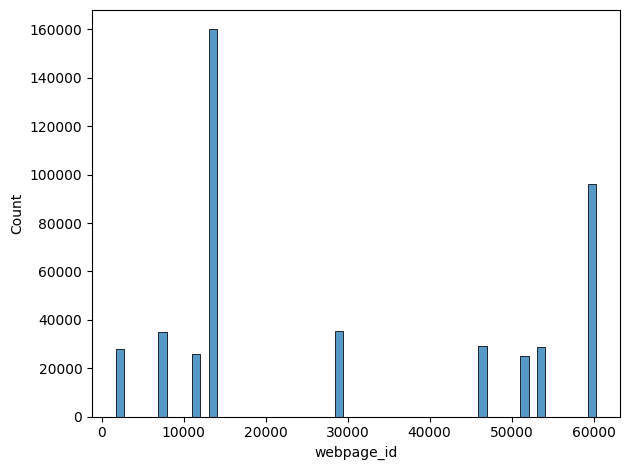

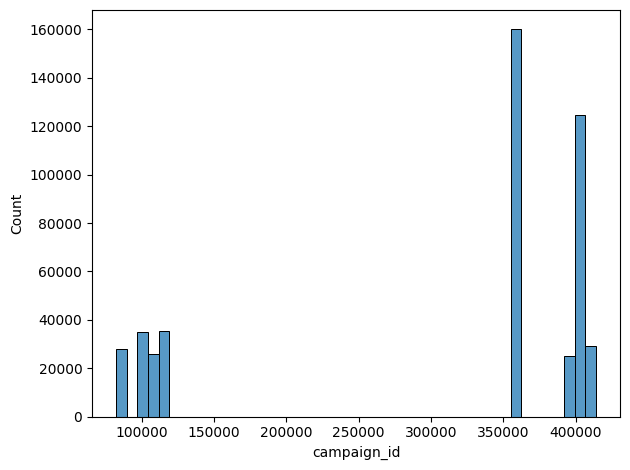

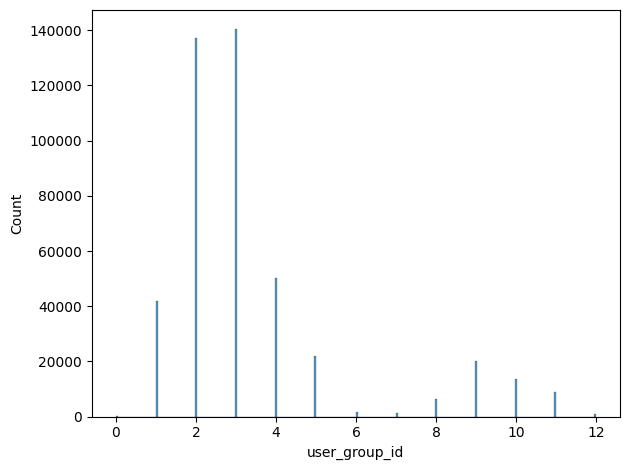

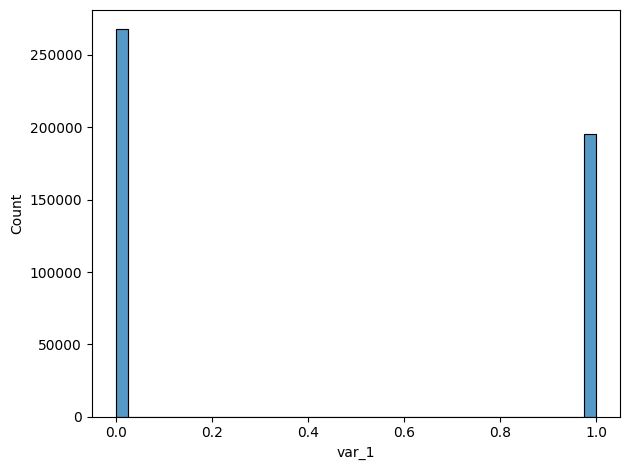

In [53]:
parameters = ["session_id", "webpage_id", "campaign_id", "user_id", "user_group_id", "var_1", "DateTime"]
num_parameter = len(parameters)

## Nan counts
print("\n*** Printing Nan counts for AD PARAMETERS:")
for i in range(num_parameter):
    print(f"NaN counts for '{parameters[i]}': ", dataset[parameters[i]].isna().sum())

## Dtype convert
dataset["user_group_id"] = pd.to_numeric(dataset["user_group_id"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())

## Value counts
parameters = ["webpage_id", "campaign_id", "user_group_id", "var_1"]
num_parameter = len(parameters)
print("\n*** Printing value counts for AD PARAMETERS:")
for i in range(num_parameter):
    value_counts = dataset[parameters[i]].value_counts()
    print(f"Value counts: {value_counts}\n")

## Plot Histogram
for i in range(num_parameter):
    sns.histplot(dataset[parameters[i]])

    plt.tight_layout()
    plt.show()

## PRODUCT PARAMETERS


*** Printing Nan counts for PRODUCT PARAMETERS:
NaN counts for 'product':  0
NaN counts for 'product_category_1':  0
NaN counts for 'product_category_2':  365854

*** Printing value counts for PRODUCT PARAMETERS:
Value counts: product
C    163501
H    109574
I     63711
D     41064
B     22479
E     21452
A     15391
J      9698
G      9414
F      7007
Name: count, dtype: int64

Value counts: product_category_1
4    133290
3    113812
1     81141
2     69183
5     65865
Name: count, dtype: int64

Value counts: product_category_2
82527.0     35531
146115.0    25224
270915.0    19624
254132.0    12502
143597.0     2701
269093.0      858
32026.0       578
18595.0        76
408790.0       67
255689.0       62
419804.0       43
372532.0       41
66101.0        34
234846.0       25
235358.0       19
450184.0       14
408831.0       12
327439.0        8
300711.0        4
447834.0        3
168114.0        2
99226.0         2
202351.0        1
301147.0        1
270147.0        1
181650.0      

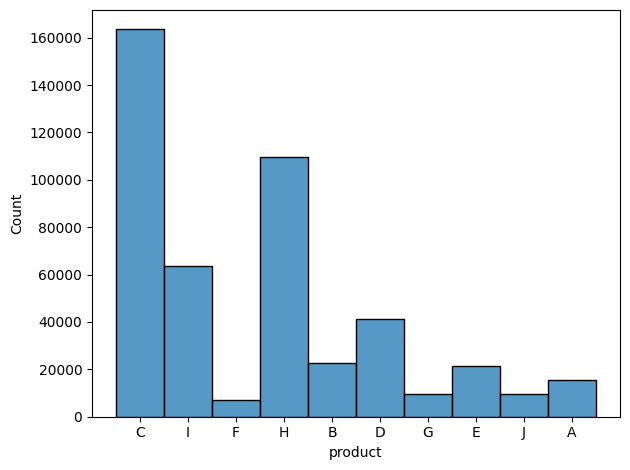

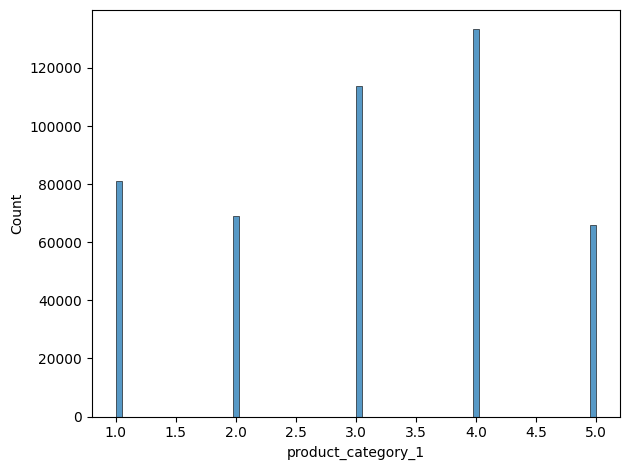

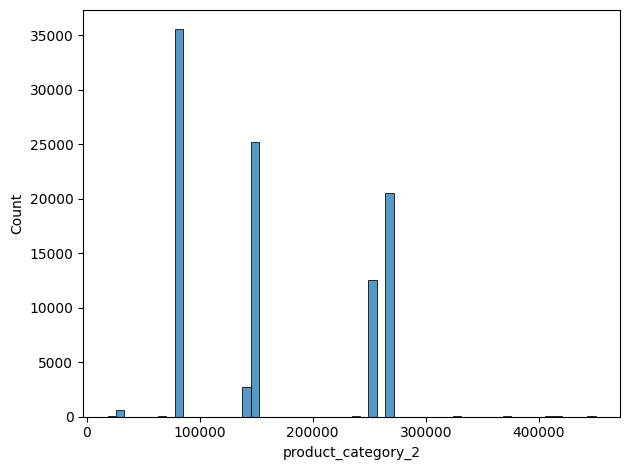

In [54]:
parameters = ["product", "product_category_1", "product_category_2"]
num_parameter = len(parameters)

## Nan counts
print("\n*** Printing Nan counts for PRODUCT PARAMETERS:")
for i in range(num_parameter):
    print(f"NaN counts for '{parameters[i]}': ", dataset[parameters[i]].isna().sum())

## Dtype convert
dataset["age_level"] = pd.to_numeric(dataset["age_level"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())
dataset["user_depth"] = pd.to_numeric(dataset["user_depth"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())
dataset["city_development_index"] = pd.to_numeric(dataset["city_development_index"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())

## Value counts
print("\n*** Printing value counts for PRODUCT PARAMETERS:")
for i in range(num_parameter):
    value_counts = dataset[parameters[i]].value_counts()
    print(f"Value counts: {value_counts}\n")

## Plot Histogram
for i in range(num_parameter):
    sns.histplot(dataset[parameters[i]])

    plt.tight_layout()
    plt.show()

## USER PARAMETERS


*** Printing Nan counts for USER PARAMETERS:
NaN counts for 'gender':  18243
NaN counts for 'age_level':  18243
NaN counts for 'user_depth':  18243
NaN counts for 'city_development_index':  125129

*** Printing value counts for USER PARAMETERS:
Value counts: gender
Male      393454
Female     51594
Name: count, dtype: int64

Value counts: age_level
3    160581
2    143501
4     63859
1     43367
5     30828
6      2759
0       153
Name: count, dtype: Int64

Value counts: user_depth
3    402798
2     30389
1     11861
Name: count, dtype: Int64

Value counts: city_development_index
2    147643
3     88709
4     67166
1     34644
Name: count, dtype: Int64



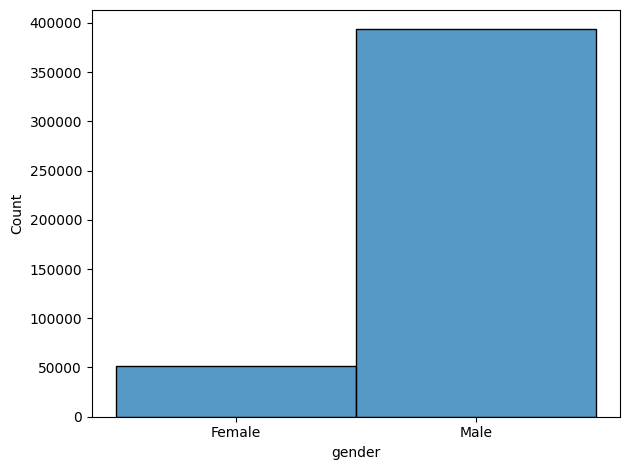

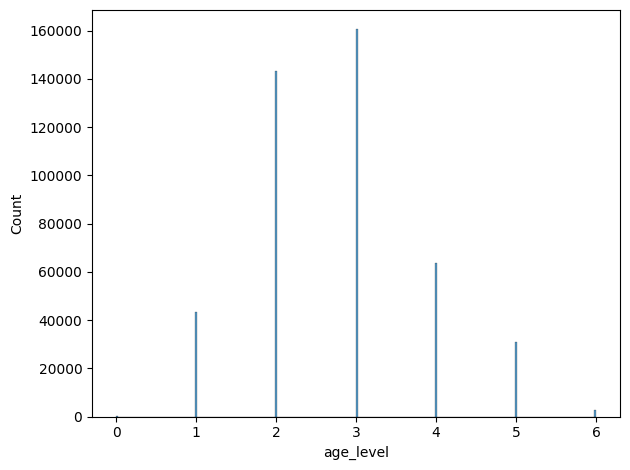

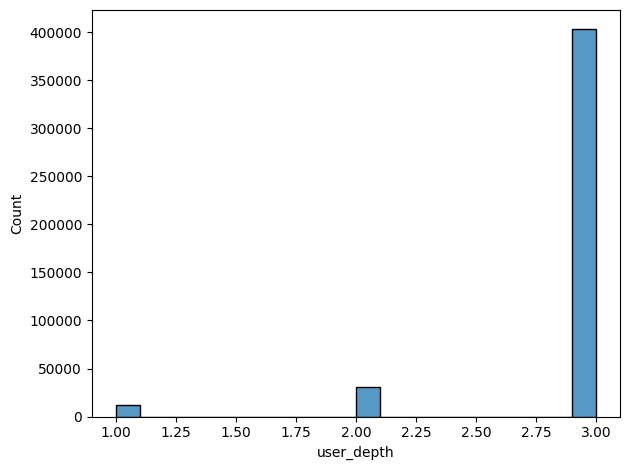

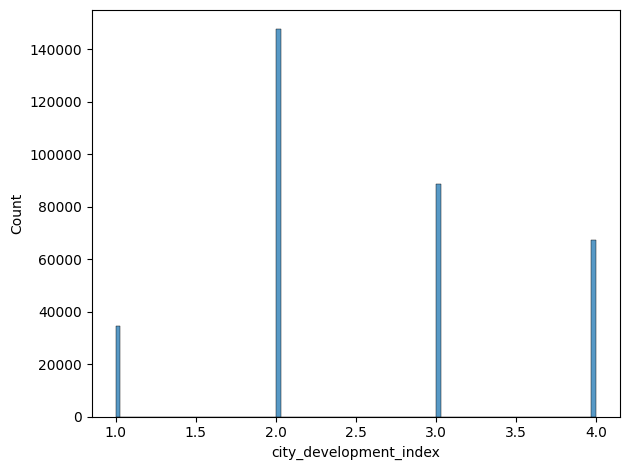

In [55]:
parameters = ["gender", "age_level", "user_depth", "city_development_index"]
num_parameter = len(parameters)

## Nan counts
print("\n*** Printing Nan counts for USER PARAMETERS:")
for i in range(num_parameter):
    print(f"NaN counts for '{parameters[i]}': ", dataset[parameters[i]].isna().sum())

## Dtype convert
dataset["age_level"] = pd.to_numeric(dataset["age_level"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())
dataset["user_depth"] = pd.to_numeric(dataset["user_depth"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())
dataset["city_development_index"] = pd.to_numeric(dataset["city_development_index"].apply(convert_to_int), errors='coerce').astype(pd.Int64Dtype())

## Value counts
print("\n*** Printing value counts for USER PARAMETERS:")
for i in range(num_parameter):
    value_counts = dataset[parameters[i]].value_counts()
    print(f"Value counts: {value_counts}\n")

## Plot Histogram
for i in range(num_parameter):
    sns.histplot(dataset[parameters[i]])

    plt.tight_layout()
    plt.show()

# PREDICT PARAMETER


*** Printing Nan counts for PREDICT PARAMETERS:
NaN counts for 'is_click':  0

*** Printing value counts for PREDICT PARAMETERS:
Value counts: is_click
0    431960
1     31331
Name: count, dtype: int64



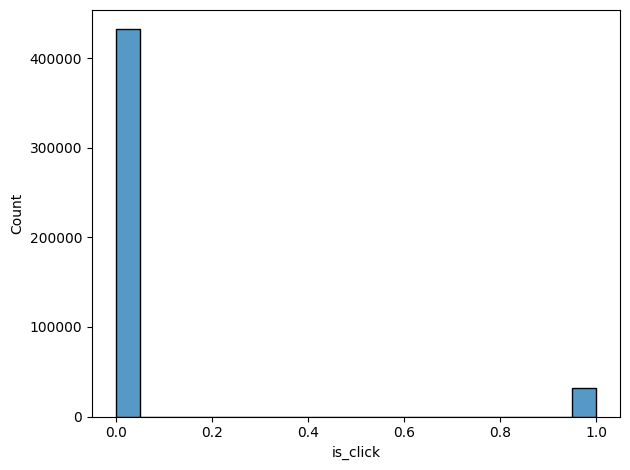

In [56]:
parameters = ["is_click"]
num_parameter = len(parameters)

## Nan counts
print("\n*** Printing Nan counts for PREDICT PARAMETERS:")
for i in range(num_parameter):
    print(f"NaN counts for '{parameters[i]}': ", dataset[parameters[i]].isna().sum())

## Value counts
print("\n*** Printing value counts for PREDICT PARAMETERS:")
for i in range(num_parameter):
    value_counts = dataset[parameters[i]].value_counts()
    print(f"Value counts: {value_counts}\n")

## Plot Histogram
for i in range(num_parameter):
    sns.histplot(dataset[parameters[i]])

    plt.tight_layout()
    plt.show()

# Missing values

In [59]:
# Check parameters with missing values
print(dataset.isna().sum()/dataset_size*100)


session_id                0.000000
DateTime                  0.000000
user_id                   0.000000
product                   0.000000
campaign_id               0.000000
webpage_id                0.000000
product_category_1        0.000000
product_category_2        5.264567
user_group_id             0.262513
gender                    0.262513
age_level                 0.262513
user_depth                0.262513
city_development_index    1.800582
var_1                     0.000000
is_click                  0.000000
dtype: float64


# Dataset Transformation

In [74]:
df = pd.DataFrame(dataset)
num_filas_con_nan = df.drop(columns="product_category_2").isna().any(axis=1).sum()

print(f"Número de filas con al menos un valor NaN: {num_filas_con_nan}")

def encode_one_hot(dataset, columns):
    dataset = pd.get_dummies(dataset, columns=columns)
    return dataset

df.sample(5)

df_2 = encode_one_hot(df, ["gender", "user_depth"])
df_2.sample(5)


Número de filas con al menos un valor NaN: 125129


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,age_level,city_development_index,var_1,is_click,gender_Female,gender_Male,user_depth_1,user_depth_2,user_depth_3
84311,285070,2017-07-03 05:38,556143,C,405490,60305,2,NaN,2,2,2,0,0,False,True,False,False,True
378281,345619,2017-07-06 19:14,933986,H,414149,45962,5,NaN,3,3,<NA>,0,0,False,True,False,True,False
433031,143832,2017-07-07 12:34,46233,C,359520,13787,4,NaN,3,3,4,0,0,False,True,False,False,True
81980,66549,2017-07-03 04:40,577271,C,405490,60305,3,NaN,3,3,3,1,0,False,True,False,False,True
347388,524223,2017-07-06 12:37,903976,B,414149,45962,2,143597.0,9,3,<NA>,0,0,True,False,False,False,True
